# Intro to PRAW - Python Reddit API Wrapper
<img src='reddit_logo.jpg' width='480px'>

<img src="reddit_all.jpg">

## Getting Started
https://www.reddit.com/prefs/apps
<img src='signup.jpg' style='border:blue 2px solid'>
•select 'script' type for basic use<br>
•pip install praw

In [4]:
import praw
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

%matplotlib inline
sns.set_style('darkgrid')

In [5]:
def load_credentials(filename='/Users/hmamin/creds/praw_msds.txt'):
    """Read praw credentials from file. Return a list of field names
    and a list of values.
    """
    with open(filename, 'r') as f:
        rows = f.readlines()
        cred_fields, cred_vals = [row.strip().split(',') for row in rows]
    return cred_fields, cred_vals


cred_fields, cred_vals = load_credentials()
reddit = praw.Reddit(client_id=cred_vals[0], client_secret=cred_vals[1],
                    username=cred_vals[2], password=cred_vals[3],
                    user_agent=cred_vals[4])
reddit.user.me()

Redditor(name='hdmamin')

## Subreddits and Submissions

In [7]:
sub_sports = reddit.subreddit('sports')
for post in sub_sports.top(time_filter='year', limit=3):
    print('Title:', post.title)
    print('Upvotes:', post.score)
    print('Author:', str(post.author))
    print('Link:', post.permalink, '\n')

Title: Weightlifter promised his wife to win an Olympic gold medal before she died in a car accident
Upvotes: 141648
Author: unknown_human
Link: /r/sports/comments/7k6zaz/weightlifter_promised_his_wife_to_win_an_olympic/ 

Title: A Pelicans fan snuck on to the court for warmups, stretched and put up a shot before the police escorted him off
Upvotes: 103442
Author: JF_112
Link: /r/sports/comments/7ttqeu/a_pelicans_fan_snuck_on_to_the_court_for_warmups/ 

Title: "Just stay in there, you're done for tonight"
Upvotes: 101420
Author: woody313
Link: /r/sports/comments/80xq68/just_stay_in_there_youre_done_for_tonight/ 



## Comments

In [9]:
sub_books = reddit.subreddit('books')
scores, users, text, wordcounts = [], [], [], []

for post in sub_books.top(time_filter='month', limit=1):
    print(f'Post title: {post.title}\n')
    post.comments.replace_more(limit=0)
    comments = post.comments.list()
    
    # Iterate through comments in post and extract attributes.
    for i, comment in enumerate(comments):
        if i == 0:
            print(f'Sample Comment\nAuthor: {comment.author}\nScore: '
                  f'{comment.score}\nBody: {comment.body}')
        scores.append(comment.score)
        users.append(str(comment.author))
        text.append(comment.body)
        wordcounts.append(len(comment.body.split()))

Post title: "The Pennsylvania Department is Corrections is banning prisoners from receiving books. Instead, they can buy a $149 e-reader, and pay between $2-$29 for e-books of work largely in the public domain. There are no dictionaries available"

Sample Comment
Author: Chtorrr
Score: 1
Body: For context here ebooks in the public domain can be downloaded for free by anyone - [Project Gutenberg is a great source](http://www.gutenberg.org/ebooks/search/?sort_order=downloads) Most of them are also available for free from major ebook retailers like Amazon.  

[LibriVox](https://librivox.org/search?primary_key=0&search_category=author&search_page=1&search_form=get_results) has free audio recordings of public domain texts available as audiobooks read by volunteers. 

For anyone interested in ebooks that can be downloaded for free checkout r/FreeEBOOKS.  







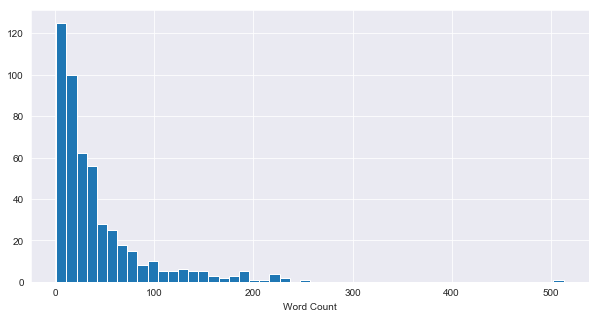

In [295]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(wordcounts, bins=50)
plt.xlabel('Word Count')
plt.show()

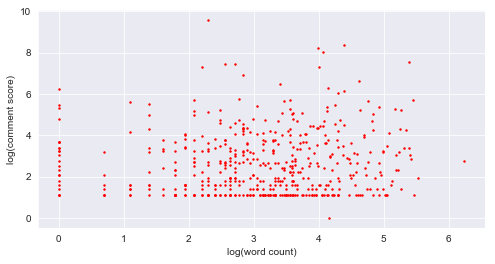

In [294]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(np.log(wordcounts), np.log(scores), color='red', s=2)
plt.xlabel('log(word count)')
plt.ylabel('log(comment score)')
plt.show()

/anaconda3/envs/live_plot/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


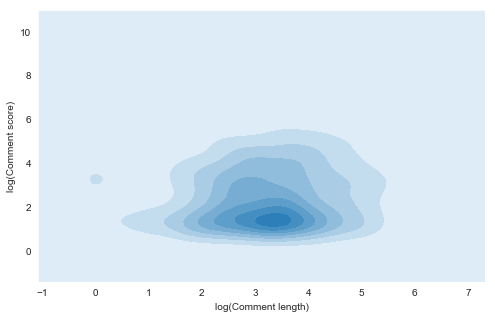

In [330]:
fig, ax = plt.subplots(figsize=(8,5))
sns.kdeplot(np.log(wordcounts), np.log(scores), shade=True)
plt.xlabel('log(Comment length)')
plt.ylabel('log(Comment score)')
plt.show()

In [10]:
def clean_text(text):
    """Pass in string. Remove punctuation and stop words and return stemmed list."""
    ps = PorterStemmer()
    stop_words = stopwords.words('English')
    stemmed = [ps.stem(word) for word in word_tokenize(text.lower())
               if word not in stop_words and len(word) > 3]
    return stemmed


def make_cloud(word_tokens, n=40):
    """Pass in list of word tokens. Create word cloud from n most common words."""
    word_counts = Counter(word_tokens)
    common_words = word_counts.most_common(n)
    cloud = WordCloud()
    cloud.fit_words(dict(common_words))
    
    # Create plot.
    fig, ax = plt.subplots(figsize=(8,4))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

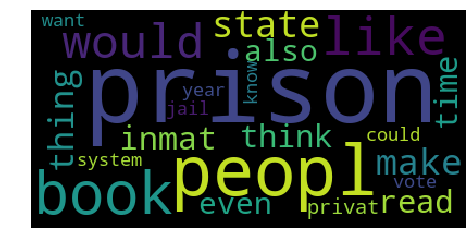

In [11]:
combined_text = ' '.join(text)
word_tokens = clean_text(combined_text)
make_cloud(word_tokens, n=22)

## Streaming

In [311]:
for comment in reddit.subreddit('all').stream.comments():
    print(comment.body)

## Posting to Reddit

In [12]:
post_title = 'Hi from MSAN610'
post_text = 'End of presentation'
sub_test = reddit.subreddit('test')
sub_test.submit(title=post_title, selftext=post_text)

Submission(id='9kjs0e')

https://www.reddit.com/r/test/new

# Final Notes
https://github.com/hdmamin/introduction_to_praw

### For more on bots
https://praw.readthedocs.io/en/latest/tutorials/reply_bot.html

### Image source
https://www.theverge.com/2018/3/14/17121066/reddit-promoted-posts-mobile-app